# Taller de Regresión Lineal Orientado al Negocio

Este taller se centra en **cómo** un negocio (por ejemplo, un e-commerce) puede **interpretar** y **aprovechar** los resultados de la Regresión Lineal para **tomar decisiones**.

## Contexto de Negocio
Imagina que eres el/la **gerente de marketing** de una tienda en línea. Tienes un conjunto de datos con el comportamiento de los clientes y la **cantidad anual** que han gastado (`Yearly Amount Spent`). Tu objetivo es:
1. **Identificar** qué factores (tiempo en la app, duración de la sesión, etc.) influyen más en el gasto anual.
2. **Predecir** el gasto anual futuro de los clientes.
3. Traducir estos hallazgos en **acciones concretas** que aumenten el gasto de los clientes.

## Datos Disponibles
Se te proporciona un dataset con las columnas:
- **Email**
- **Address**
- **Avatar**
- **Avg. Session Length** (Promedio de duración de la sesión)
- **Time on App** (Tiempo en la App)
- **Time on Website** (Tiempo en el Sitio Web)
- **Length of Membership** (Antigüedad de membresía, en años)
- **Yearly Amount Spent** (Cantidad gastada anualmente)

Tu variable objetivo para predecir es: **Yearly Amount Spent**.

## 1. Carga y Exploración de Datos

### Tarea 1.1: Cargar los datos
1. Crea un DataFrame (por ejemplo, `df`) leyendo el archivo CSV o introduciendo manualmente la tabla que se te proporcionó.
2. Muestra las primeras 5 filas (`df.head()`), la forma (`df.shape`) y los tipos de datos (`df.info()`).

**Pregunta de enfoque de negocio:**
- ¿Qué **insights** iniciales obtienes con solo ver las variables? ¿Cómo podría eso impactar tus **estrategias de marketing**?

In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv

--2025-03-10 15:42:48--  https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv [following]
--2025-03-10 15:42:48--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87360 (85K) [text/plain]
Saving to: ‘Ecommerce _Customers.csv’

Ecommerce _Customer 100%[===================>]  85.31K  --.-KB/s    in 0.002s  

2025-03-10 15:42:48 (41.5 MB/s) - ‘Eco

In [ ]:
# EJEMPLO de código:
import pandas as pd

# Supongamos que has guardado tu dataset en un archivo 'data.csv'
df = pd.read_csv('Ecommerce _Customers.csv')
df.head()



,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.shape

(500, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Con solo ver la informacion general, podemos ver el Address, e-mail, avatar y estos son datos demograficos personales, estos son utiles para segmentar, por otro lado encontramos Avg. Session Length y habla de cuanto tiempo duran los usuarios en la web, Time on App vs Time on Website, Length of Membership, Yearly Amount Spent, podemos coger esta informacion como estrategia, para segmentar los clientes, hacer mejores planes de retencion, por otro lado podemos ver la optimización, Si el Tiempo en la Web es alto, pero el gasto bajo,se podra revisar la experiencia de usuario, mejorar el proceso de compra o facilitar la navegación.

### Tarea 1.2: Análisis Exploratorio (EDA) Básico
1. Ejecuta `df.describe()` para revisar las estadísticas descriptivas de las variables numéricas.
2. Realiza uno o dos **boxplots** o **histogramas** para visualizar la distribución de:
   - **Avg. Session Length**
   - **Time on App**
   - **Time on Website**
   - **Length of Membership**
   - **Yearly Amount Spent**

**Preguntas de negocio:**
1. Si detectas que, por ejemplo, la gente con **mayor** `Length of Membership` gasta más, ¿qué **estrategias** implementarías para retener y "graduar" a los nuevos clientes a miembros más "antiguos"?
2. Si notas que el **Time on Website** es muy bajo vs. **Time on App**, ¿implica que debas mejorar la experiencia en el sitio web para que la gente pase más tiempo allí?

In [ ]:
df.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


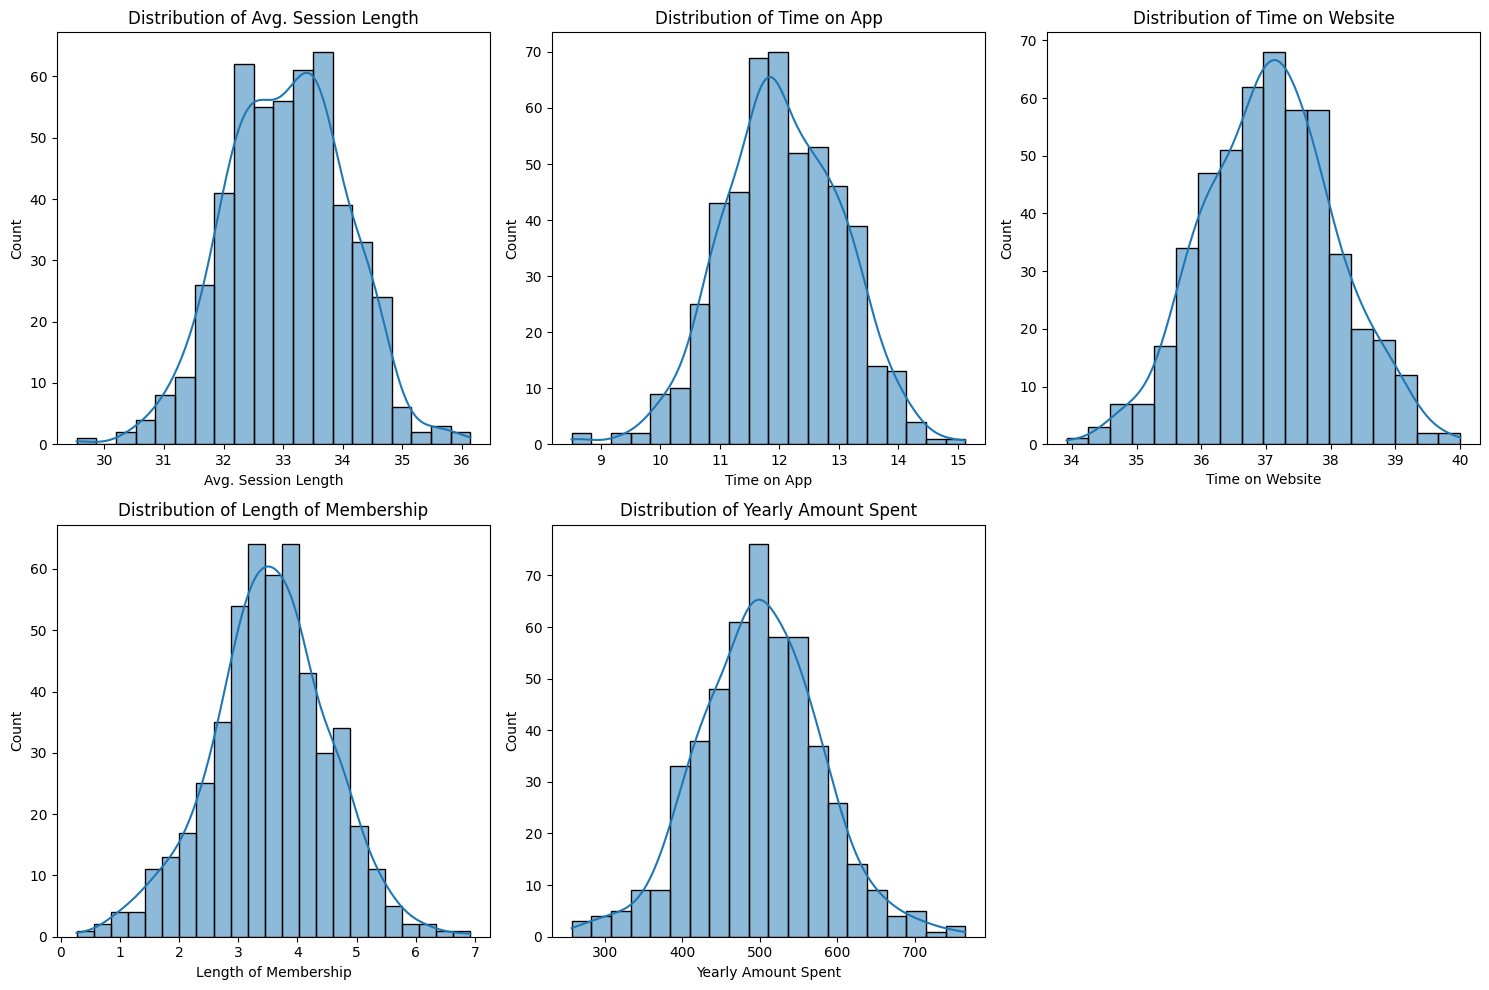

In [ ]:
import matplotlib.pyplot as plt
import seaborn as s
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']):
  plt.subplot(2, 3, i+1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


1. Encontramos que los clinetes con mas años de antiguedad gastan mas, por ende vamos a crear una estrategia de retencion, para eso podemos generar beneficios segun el nivel de plan que manejan, bonos por fidelidad (tiempo que llevan), descuentos recurrentes

2. Segun el histogrma podemos observar que el Time on App es menor que el Time on Website, para eso podemos utilizar las sigientes estrategias para mejorar Optimizar el diseño y la navegación, que el sitio reaccione rápidamente, contenido dinámico y personalizado Agilizar el proceso de compra, estimular la permanencia generando mas ofertas especiales, juegos, contenido único.

## 2. Selección de Variables
En este dataset, algunas columnas como **Email**, **Address** o **Avatar** no son útiles directamente para el modelo de regresión.

### Tarea 2.1: Elegir features
- Usarás como variables predictoras (features) las siguientes columnas:
  1. **Avg. Session Length**
  2. **Time on App**
  3. **Time on Website**
  4. **Length of Membership**
- La columna objetivo (target) será **Yearly Amount Spent**.

**Pregunta de negocio**:
- ¿Por qué estas columnas tienen sentido para **explicar** el gasto anual? (Piensa en la lógica, "mientras más tiempo en app, más oportunidades de compra").

In [ ]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

Esto tiene sentido ya que describen el comportamiento y la relacion del cliente con la plataforma, es decir que entre mas tiempo, hay mayor interaccion, por ende hay mayor probabilidad de oportunidades de compra

## 3. Dividir el Dataset en Entrenamiento y Prueba
Para evaluar la capacidad de nuestro modelo de generalizar, dividiremos los datos en **train (80%)** y **test (20%)**.

**Pregunta de negocio**:
- ¿Cómo explicarías, en términos empresariales, que "apartamos" datos para prueba y no los usamos en el entrenamiento? ¿Qué importancia tiene para "predecir" clientes futuros?

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")

Entrenamiento: 400 muestras
Prueba: 100 muestras


El objetivo de un modelo es anticipar el comportamiento de nuevos clientes, no solo describir a los antiguos.
Vamos a entrenar 400 datos, esto con el fin de que el modelo los estudie. Para demostrar que cuando entrenamos datos el margen de error es bajo, cuando se haga la prueba de los 100 datos o el 20% restante que tanto se equivoca viendo datos nuevos, si el margen de error es bajo podemos decir que el modelo es efectivo, separar datos para prueba nos asegura que el modelo es útil para el futuro:
Predecir quién gastará más.
Saber a qué clientes ofrecer promociones.
Anticipar quién podría abandonar la plataforma.


## 4. Entrenar el Modelo de Regresión Lineal
1. **Crea** un objeto `LinearRegression()`.
2. **Entrena** el modelo con los datos de entrenamiento.
3. **Obtén** el intercepto y los coeficientes resultantes.

**Pregunta de negocio**:
- Si el coeficiente de `Time on App` es grande y positivo, ¿cómo podrías usar esta información para crear **campañas** o **mejoras** en la aplicación que incentiven al usuario a pasar más tiempo allí?

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Extraer los coeficientes
intercept = model.intercept_
coef = model.coef_[0]

print(f"Intercept (beta_0): {intercept:.2f}")
print(f"Coeficiente (beta_1): {coef:.2f}")

Intercept (beta_0): -1044.26
Coeficiente (beta_1): 25.60


Tenemos un TIME ON negativo, lo que suguiere una inversa entre el tiempo que un usuaria en la app y la cantidad que gasta aunual, podemos buscar mejoras en optimizar el proceso de compras, destacar promociones, persoanlizar las recomendaciones.


## 5. Evaluación del Modelo
1. **Predice** en el conjunto de prueba.
2. Calcula las **métricas** MSE, MAE y R² para verificar la calidad de tu modelo. No profundizaremos en residuos, solo en la idea de si el modelo "le atina" al gasto anual.

**Preguntas de negocio**:
1. ¿Qué interpretas si **R²** es cercano a 0.80 o 0.90? ¿El modelo es “bueno” para tus objetivos?
2. Si el **MAE** es, por ejemplo, 15 USD, ¿es aceptable ese margen de error para tu negocio?

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Conjunto de Entrenamiento:")
print(f"MSE: {mse_train:.2f}")
print(f"R^2: {r2_train:.2f}")
print("\nConjunto de Prueba:")
print(f"MSE: {mse_test:.2f}")
print(f"R^2: {r2_test:.2f}")

Conjunto de Entrenamiento:
MSE: 95.82
R^2: 0.99

Conjunto de Prueba:
MSE: 109.86
R^2: 0.98


Se creo un modelo que predice con una alta precision el gasto anual de los clinetes, en funcion de su interaccion en la app.
El modelo supone que el 98% de la varianza en el gasto anual, lo que hace referencia a que tiene un margen de error bajo, esto nos facilita comprender más a fondo qué elementos afectan el desembolso del cliente y tomar decisiones más fundamentadas para optimizar nuestras tácticas de mercadotecnia y venta.

## 6. Interpretación y Aplicación Práctica
1. **Observa** los coeficientes resultantes: ¿qué variable es la más influyente? ¿Cómo impacta eso en tu estrategia de negocios?
2. **Propuestas** de acción:
   - Si `Time on App` es el que más incide, podrías **invertir** más en mejoras de la app.
   - Si `Length of Membership` está ligado a más gasto, podrías **fidelizar** a los nuevos clientes con promociones.

**Preguntas de negocio**:
1. ¿Cómo comunicarías estos resultados a un equipo directivo que no maneja detalles estadísticos?
2. ¿Qué **acciones concretas** aplicarías para aumentar el gasto anual de los clientes, basándote en los coeficientes del modelo?

## 7. Conclusión: Caso de Negocio Real
1. Redacta un breve **informe** o explicación final que responda:
   - ¿Qué **variables** explican mejor el gasto anual?
   - ¿Qué recomendaciones propones para aumentar el **Yearly Amount Spent**?
2. **Limitaciones**: Menciona cualquier aspecto que el modelo no cubra (datos no considerados, linealidad asumida, etc.).

Con estos pasos, podrás llevar la **visión estadística** a un **plan de acción** en tu estrategia de negocio.

  Objetivo
Este reporte expone los hallazgos del estudio efectuado para determinar las variables que mejor representan el desembolso anual de los clientes y sugerir sugerencias para incrementarlo.

  Técnica:
Se empleó un modelo lineal de regresión para estimar el desembolso anual basándose en las variables siguientes: Normal. Length de sesión, Duración en la aplicación, Duración en la web, y Duración de la membresía. El modelo se capacitó con el 80% de la información y se evaluó con el 20% restante.

  Conclusiones:
 El modelo señala que la variable "Length of Membership" (Antiguedad de la membresía) influye más en el desembolso anual, siendo la siguiente la variable "Avg. "Longitud de la sesión media" (Duración media de la sesión). Esto indica que los clientes de mayor edad y que dedican más tiempo a cada sesión suelen incurrir en un mayor gasto.





# Resumen de las Tareas
1. **EDA Rápido**: Cargar y describir el dataset.
2. **Selección de Variables**: Explicar por qué se usan las columnas numéricas y se ignoran Email/Address.
3. **Entrenamiento**: Ajustar el modelo de Regresión con `Avg. Session Length`, `Time on App`, `Time on Website`, `Length of Membership`.
4. **Evaluación**: Observar MSE, MAE, R².
5. **Interpretación**: Explicar cómo usaría el negocio estos resultados.

## ¡Listo para Analizar!
Sigue estos pasos, responde las **preguntas de negocio** y, sobre todo, **conecta** tus hallazgos con **acciones** en el mundo real.

> **Nota**: Puedes consultar documentación o herramientas como ChatGPT si lo requieres, pero recuerda que las **respuestas** deben ser **tuyas**, pensando en el contexto de negocio y la lógica detrás de los coeficientes. ¡Éxito!